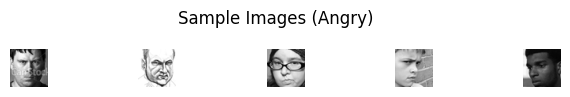

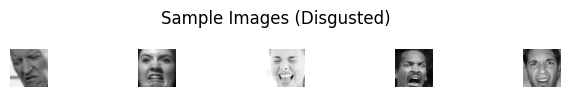

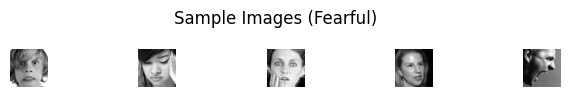

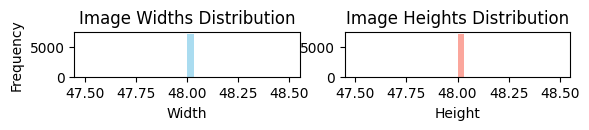

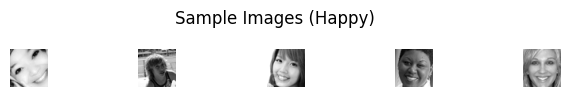

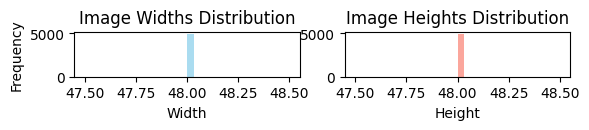

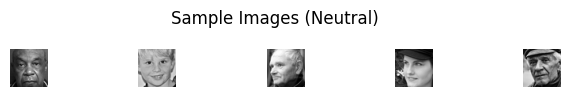

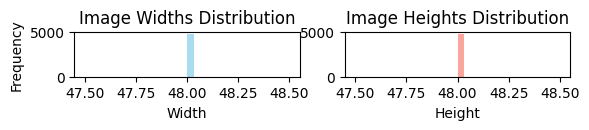

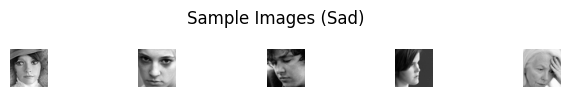

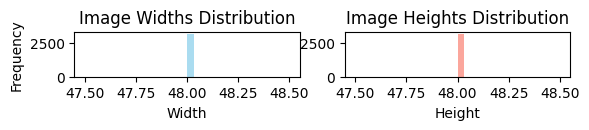

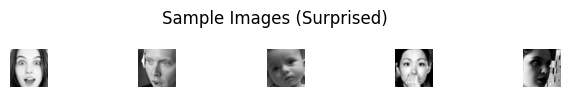

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define a function to plot image sizes and sample images
def plot_image_data(emotion, path_to_images, subplot_index):
    # Get a list of image file names
    image_files = [f for f in os.listdir(path_to_images) if f.endswith(('.png'))]

    if not image_files:
        print(f"No valid image files found in the folder for {emotion}.")
    else:
        # Example data visualization
        # Plotting image sizes
        image_sizes = []
        for img in image_files:
            try:
                size = Image.open(os.path.join(path_to_images, img)).size
                image_sizes.append(size)
            except Exception as e:
                print(f"Error processing image {img}: {e}")

        if image_sizes:
            widths, heights = zip(*image_sizes)

            plt.subplot(subplot_index, 2, 1)
            plt.hist(widths, bins=30, color='skyblue', alpha=0.7)
            plt.title('Image Widths Distribution')
            plt.xlabel('Width')
            plt.ylabel('Frequency')

            plt.subplot(subplot_index, 2, 2)
            plt.hist(heights, bins=30, color='salmon', alpha=0.7)
            plt.title('Image Heights Distribution')
            plt.xlabel('Height')

            # Displaying sample images
            plt.figure(figsize=(8, 4))
            for i in range(min(5, len(image_files))):
                img = Image.open(os.path.join(path_to_images, image_files[i]))
                plt.subplot(subplot_index, 5, i + 1)
                plt.imshow(img, cmap='gray')
                plt.axis('off')
            plt.suptitle(f'Sample Images ({emotion.capitalize()})')
            plt.show()

# Define the emotions and their corresponding folders
emotions = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

# Create subplots for each emotion
plt.figure(figsize=(10, 60))

for idx, emotion in enumerate(emotions, start=1):
    path_to_images = f'/content/train/{emotion}'
    plot_image_data(emotion, path_to_images, len(emotions))

plt.subplots_adjust(hspace=0.5)  # Adjust vertical space between subplots
plt.tight_layout()
plt.show()
